#### Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

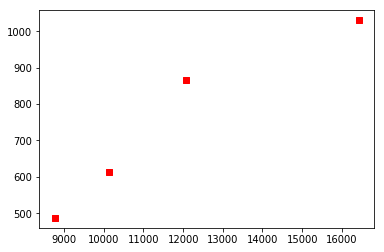

In [2]:
x_data = np.array([8759, 10132, 12078, 16430])
y_data = np.array([487, 612, 866, 1030])

plt.scatter(x_data, y_data, color = 'r', marker = 's')
plt.show()

In [3]:
weight_0 = np.random.sample(5)
weight_1 = np.random.sample(5)

In [4]:
y_hat_list = []
for w0, w1 in zip(weight_0, weight_1) :
    y_hat_list.append(w0 + w1*x_data)

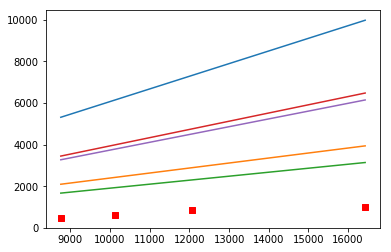

In [5]:
plt.scatter(x_data, y_data, color = 'r', marker = 's')
for y_hat in y_hat_list :
    plt.plot(x_data, y_hat)
plt.show()

#### Linear Regression with Gradient Descent

In [6]:
df = pd.read_csv('slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
raw_X = df['X'].values.reshape(-1, 1)
y = df['Y'].values

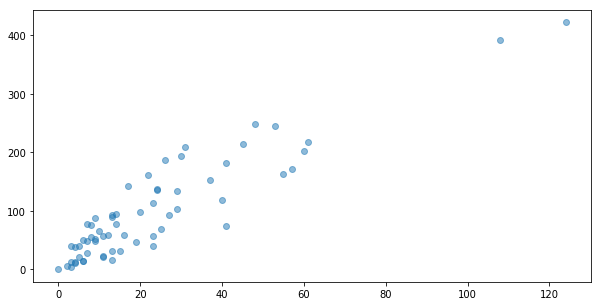

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

In [9]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [10]:
 np.ones((len(raw_X), 1))[:5]    # 상수항 추가

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis = 1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [12]:
w = np.random.normal((2, 1))
w

array([2.42948569, 1.13776012])

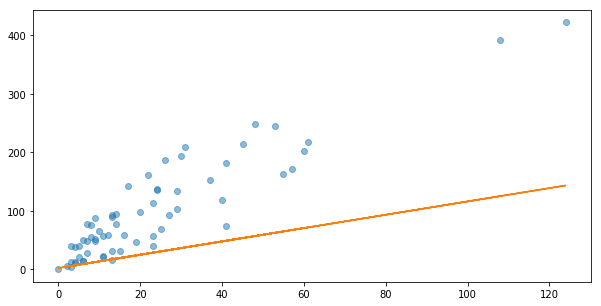

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

y_predict = np.dot(X, w)
plt.plot(raw_X, y_predict)

#### Hypothsis and Cost Function

In [14]:
def hypothesis_function(X, theta) :
    return X.dot(theta)

In [15]:
hypothesis_function(X, w)[:5]     # 예측치

array([125.30757901,  24.04692803,  17.22036729, 143.51174099,
        47.93989062])

In [16]:
def cost_function(h, y) :
    return(1/(2*len(y))) * np.sum((h-y)**2)

In [17]:
h = hypothesis_function(X, w)
cost_function(h, y)

4444.3229271328255

In [18]:
def gradient_descent(X, y, w, alpha, iterations) :
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]
    
    for i in range(iterations) :
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        theta = np.array([t0, t1])      # t0와 t1을 계산한 이후 simutenous하게 theta를 업데이트
        
        if i % 10 == 0 :    # 10번 iter마다 theta와 cost 기록
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)
        
    return theta, theta_list, cost_list

In [19]:
iterations = 10000
alpha = 0.001
theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print('theta :', theta)
print('cost :', cost_function(hypothesis_function(X, theta), y))

theta : [19.88289936  3.41623297]
cost : 625.3741128562565


In [20]:
theta_list[:10]

[[2.4294856860334835, 1.1377601233807693],
 [2.4991833772039826, 3.9556358780742946],
 [2.583886696443637, 3.789759682523976],
 [2.671685534729179, 3.787863897393043],
 [2.7590416176576813, 3.785977672400382],
 [2.8459571779728794, 3.7841009593356274],
 [2.9324344371591415, 3.7822337102316643],
 [3.018475605498252, 3.780375877363267],
 [3.1040828821258986, 3.778527413245881],
 [3.1892584550878853, 3.7766882706344087]]

In [21]:
cost_list[:10]

[4444.3229271328255,
 717.0714568978955,
 702.012199387817,
 701.2411696617983,
 700.4778966850117,
 699.7223024226472,
 698.9743096249431,
 698.2338418192899,
 697.5008233024117,
 696.7751791326257]

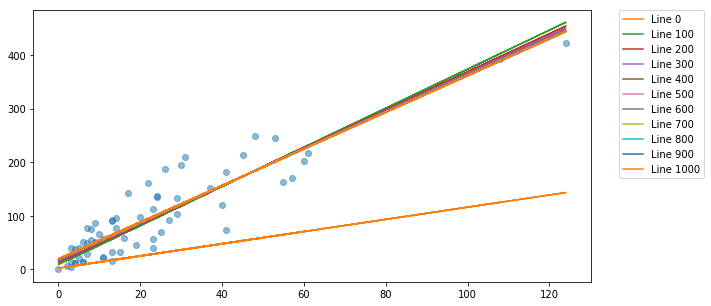

In [22]:
plt.figure(figsize = (10, 5))
theta_list = np.array(theta_list)
y_predict_step = np.dot(X, theta_list.transpose())
plt.plot(raw_X, y, 'o', alpha = 0.5)
for i in range(0, len(cost_list), 100) :
    plt.plot(raw_X, y_predict_step[:, i], label = 'Line %d' %i)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In [25]:
from mpl_toolkits.mplot3d import Axes3D
ms = np.linspace(theta[0] - 15, theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15, theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)
zs = np.array([cost_function(y, hypothesis_function(X, theta))
              for theta in zip(np.ravel(M), np.ravel(B))])
z = zs.reshape(M.shape)

NameError: name 'Z' is not defined

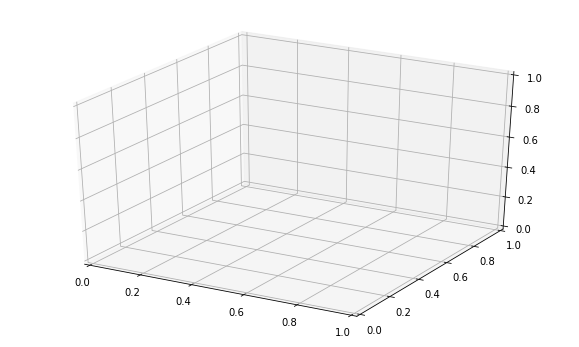

In [26]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(M, B, Z, rstride = 1, cstride = 1, color = 'b', alpha = 0.2)
ax.contour(M, B, Z, 10, color = 'b', alpha = 0.5, offset = 0, stride = 30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev = 30., azim = 30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]], markerfacecolor = 'r', markeredgecolor = 'r', marker = 'x')

### Boston Housing Data

In [27]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [28]:
boston = load_boston()

x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)

x_data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [29]:
x_data.shape

(506, 13)

In [31]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 1.00000000e+00,
        2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 6.94385898e-01, 5.99382080e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 9.89737254e-01,
        6.34657837e-02]])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size = 0.33)

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 8)
regr.fit(x_scaled_data, y_data)
print('Coefficients : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coefficients :  [[ -9.53495156   4.63952195   0.56906733   2.6885614   -8.64873871
   19.85700309   0.07292809 -16.22877191   7.03006588  -6.46057746
   -8.96255741   3.7248827  -19.04291078]]
Intercept :  [26.61291386]


In [37]:
print(regr.predict(x_data[0].reshape(1, -1)))
print(x_data[0].dot(regr.coef_.T) + regr.intercept_)

[[-483.19114376]]
[-483.19114376]


In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [41]:
y_true = y_test
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7902082880063481, 2.7820744707441025, 14.588019435445378)